# Assignment 4: Implementation of ConvNets (start early on this one!)
-------------------------------------
**Dr. Dave Wanik - OPIM 5509: Introduction to Deep Learning - University of Connecticut**

Hi class, this is my first time giving a homework like this on ConvNets, but I think you will really enjoy it since it's practical ConvNet implementation vs. a simple math problem. *If you have any code problems, please post on the Discussion Board so your classmates and I can help!*

Below is a great demo script that I found on how to use 'Bing image downloader' with Colab! Please clean up/update the script to download at least 200 images of any two classes you would like to predict (such as 'person wearing mask' and 'person not wearing a mask'). You may need to download a few different search queries if Bing limits you to 100 images - be creative about how you can get more data. The data will download locally onto this runtime (click the folder icon on the left), and you can move files and create new folders for train, test, validation partition. You can delete any unncessary code, of course.

We haven't shown how to do this in class, but here's a code that shows you how to copy N images over from train folder to the test folder:
* https://stackoverflow.com/questions/60090552/copying-file-from-one-directory-to-another-directory-in-google-colab

If you get stuck prepping your data on the local runtime, reach out on the Discussion Board!

When you submit your assignment, I should be able to run your ENTIRE script without mounting the Google Drive since everything is locally downloaded and prepared. This will take some extra coding but I think you can hack the stuff below to make it work.

After your data is prepared, review my existing scripts and use the image generators to read data and fit a model like we did for Cats and Dogs! You can go as far as you want with this assignment in terms of the modeling but **you must build at least one vanilla ConvNet model and you must evaluate the model** (remember: evaluating a generator can be tricky, see my code for help.) If you want to go above and beyond, try using transfer learning or fine tuning or data augmentation. You will probably get a better fitting model!

Of course, your script should be beautifully laid out with lots of subheaders and comments. When you are done with this assignment, it should be of such quality that you would be proud to share this notebook with a potential employer to demonstrate your computer vision skills. 

**Rubric:**
* (10 points) Provide a nice five to ten sentence of the problem you are trying to solve with image classification (please only do binary classification for this assignment.)
* (40 points) Image downloader code below has been adapted to work on local runtime. New directories are created for train, test and validation partition of each class.
* (20 points) Fit a ConvNet model
* (20 points) Evaluate the ConvNet model
* (10 points) At least five meaningful, thoughtful bullets of what you learned in this assignment.

Severe points will be deducted if the notebook does not have lots of headers, text cells, comments etc. Zero points if the code is not 'run all' in its entirety before submitting (so that I can review the code output!)

Ask friends for help but do your own work. I hope you enjoy this assignment.


# Problem Statement



In its Go-Green intiative, the government of ABC country is planning to add extra taxes/fines for the vehicles causing environmental pollution. As per the recent statical data, 70% of the vehicles causing excess air pollution are motor bikes. Also, government is taking initiatives that will increase the number of people using bicycles to travel shorter distances instead of motor bike. The government is planning to reward the cities with most usage of bicycles at work, school, and other places. 

However, it is a very difficult and expensive task for the governemnt of ABC country to keep track of bicycles.

I would like to create a model using convolutional neural network to recongize the bicycles and motor bikes. I would also like to maintain the count of each of these transportation mediums. 

The ABC country would then install these devices that runs the CNN model at the major cities in the country. The results will be tracked on a daily basis based on the number of motor bikes and bicycles. The ABC country is also looking forward to higher accuracy of model that distinguishes a bicycle and motor bike.



# Data Preparation

## Downloading the Images

In [ ]:
!pip install bing-image-downloader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!mkdir images

mkdir: cannot create directory ‘images’: File exists


In [ ]:
from bing_image_downloader import downloader
downloader.download("bicycle", limit=300,  output_dir='images', adult_filter_off=True, force_replace=False)

Streaming output truncated to the last 5000 lines.
[%] Indexed 8 Images on Page 253.




[!!]Indexing page: 254

[%] Indexed 8 Images on Page 254.




[!!]Indexing page: 255

[%] Indexed 8 Images on Page 255.




[!!]Indexing page: 256

[%] Indexed 8 Images on Page 256.




[!!]Indexing page: 257

[%] Indexed 8 Images on Page 257.




[!!]Indexing page: 258

[%] Indexed 8 Images on Page 258.




[!!]Indexing page: 259

[%] Indexed 8 Images on Page 259.




[!!]Indexing page: 260

[%] Indexed 16 Images on Page 260.




[!!]Indexing page: 261

[%] Indexed 8 Images on Page 261.




[!!]Indexing page: 262

[%] Indexed 16 Images on Page 262.




[!!]Indexing page: 263

[%] Indexed 16 Images on Page 263.




[!!]Indexing page: 264

[%] Indexed 16 Images on Page 264.




[!!]Indexing page: 265

[%] Indexed 8 Images on Page 265.




[!!]Indexing page: 266

[%] Indexed 8 Images on Page 266.




[!!]Indexing page: 267

[%] Indexed 8 Images on Page 267.




[!!]Indexing page: 268

[%] Indexed 16 

In [ ]:
downloader.download("motor bike", limit=300,  output_dir='images', adult_filter_off=True, force_replace=False)

[%] Downloading Images to /content/images/motor bike


[!!]Indexing page: 1

[%] Indexed 8 Images on Page 1.


[%] Downloading Image #1 from https://www.motorbiscuit.com/wp-content/uploads/2020/11/kawasaki-ninja-400.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://silodrome.com/wp-content/uploads/2014/02/custom-moto-guzzi-motorcycle.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://c8.alamy.com/comp/DACHEY/customized-motorcycle-with-weather-protecting-canopy-shield-thailand-DACHEY.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://www.bicycleretailer.com/sites/default/files/images/article/Screen Shot 2015-09-02 at 9.36.03 AM.jpg
[!] Issue getting: https://www.bicycleretailer.com/sites/default/files/images/article/Screen Shot 2015-09-02 at 9.36.03 AM.jpg
[!] Error:: URL can't contain control characters. '/sites/default/files/images/article/Screen Shot 2015-09-02 at 9.36.03 AM.jpg' (found at least ' ')
[%] Downloading Image #4 from https://www

In [ ]:
!ls images/ -alrt

total 48
drwxr-xr-x 7 root root  4096 Oct 15 01:03  .
drwxr-xr-x 4 root root  4096 Oct 15 01:06  validation
drwxr-xr-x 4 root root  4096 Oct 15 01:06  test
drwxr-xr-x 4 root root  4096 Oct 15 01:06  train
drwxr-xr-x 1 root root  4096 Oct 15 01:54  ..
drwxr-xr-x 2 root root 16384 Oct 15 02:56  bicycle
drwxr-xr-x 2 root root 12288 Oct 15 02:59 'motor bike'


## Images Count

In [ ]:
!ls 'images'/'bicycle'

Image_100.jpg  Image_151.JPG   Image_207.jpg   Image_264.jpg  Image_48.jpg
Image_101.jpg  Image_152.jpg   Image_208.jpg   Image_265.jpg  Image_49.jpg
Image_102.jpg  Image_153.jpg   Image_209.jpg   Image_266.jpg  Image_4.jpg
Image_103.jpg  Image_154.jpg   Image_20.jpg    Image_267.jpg  Image_50.jpg
Image_104.jpg  Image_154.JPG   Image_210.jpg   Image_268.jpg  Image_50.png
Image_104.png  Image_155.gif   Image_211.jpg   Image_269.jpg  Image_51.jpg
Image_105.jpg  Image_155.jpg   Image_212.jpg   Image_26.jpg   Image_52.jpg
Image_106.gif  Image_156.jpg   Image_213.jpg   Image_270.jpg  Image_53.jpg
Image_106.jpg  Image_157.jpg   Image_214.jpg   Image_271.jpg  Image_54.jpg
Image_107.jpg  Image_158.jpg   Image_215.jpg   Image_272.jpg  Image_55.jpg
Image_108.jpg  Image_158.png   Image_216.jpg   Image_273.jpg  Image_56.jpg
Image_109.jpg  Image_159.jpg   Image_217.jpg   Image_274.jpg  Image_57.jpg
Image_10.jpg   Image_15.jpg    Image_218.jpg   Image_275.jpg  Image_58.jpg
Image_110.jpg  Image_160.j

Some of the Images are in PNG, JPEG format, so we will convert them to jpg format

In [ ]:
# Loading the Libraries

#importing libraries
import shutil
import os
from PIL import Image
from glob import glob
from keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras import models

#Image libraries
from six import BytesIO
from PIL import Image
import numpy as np
import glob
import os

# Visualization Libraries
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
# Converting Bicycle Images to jpg format

Images = os.listdir('/content/images/bicycle')
for images_name in Images: 
  imagesname,image_extension = os.path.splitext(images_name) 
  if image_extension == '.jpg':
    continue
  elif image_extension == '.png' or image_extension == '.JPG' or image_extension == '.jpeg' or image_extension == '.JPEG' or image_extension == '.PNG' or image_extension == '.gif' or image_extension == '.webp':
    img = Image.open('/content/images/bicycle/{}'.format(images_name)) 
    img = img.convert('RGB')
    img.save('/content/images/bicycle/{}.jpg'.format(imagesname)) 
    os.remove('/content/images/bicycle/{}'.format(images_name))
    

In [ ]:
!ls 'images'/'bicycle'

Image_100.jpg  Image_155.jpg  Image_209.jpg  Image_263.jpg  Image_46.jpg
Image_101.jpg  Image_156.jpg  Image_20.jpg   Image_264.jpg  Image_47.jpg
Image_102.jpg  Image_157.jpg  Image_210.jpg  Image_265.jpg  Image_48.jpg
Image_103.jpg  Image_158.jpg  Image_211.jpg  Image_266.jpg  Image_49.jpg
Image_104.jpg  Image_159.jpg  Image_212.jpg  Image_267.jpg  Image_4.jpg
Image_105.jpg  Image_15.jpg   Image_213.jpg  Image_268.jpg  Image_50.jpg
Image_106.jpg  Image_160.jpg  Image_214.jpg  Image_269.jpg  Image_51.jpg
Image_107.jpg  Image_161.jpg  Image_215.jpg  Image_26.jpg   Image_52.jpg
Image_108.jpg  Image_162.jpg  Image_216.jpg  Image_270.jpg  Image_53.jpg
Image_109.jpg  Image_163.jpg  Image_217.jpg  Image_271.jpg  Image_54.jpg
Image_10.jpg   Image_164.jpg  Image_218.jpg  Image_272.jpg  Image_55.jpg
Image_110.jpg  Image_165.jpg  Image_219.jpg  Image_273.jpg  Image_56.jpg
Image_111.jpg  Image_166.jpg  Image_21.jpg   Image_274.jpg  Image_57.jpg
Image_112.jpg  Image_167.jpg  Image_220.jpg  Image_2

In [ ]:
!ls 'images'/'motor bike'

Image_100.jpg  Image_157.jpg  Image_211.jpg   Image_265.jpg   Image_46.jpg
Image_101.jpg  Image_158.jpg  Image_212.jpg   Image_266.jpg   Image_46.png
Image_102.jpg  Image_159.jpg  Image_213.jpg   Image_267.jpeg  Image_47.jpg
Image_103.jpg  Image_15.jpg   Image_214.jpg   Image_267.jpg   Image_48.jpg
Image_104.jpg  Image_160.jpg  Image_215.jpg   Image_268.jpg   Image_49.jpg
Image_105.jpg  Image_161.jpg  Image_216.jpeg  Image_269.jpg   Image_4.jpg
Image_106.jpg  Image_162.jpg  Image_216.jpg   Image_26.jpg    Image_50.jpg
Image_107.jpg  Image_163.jpg  Image_217.jpeg  Image_270.jpg   Image_51.jpg
Image_108.jpg  Image_164.jpg  Image_217.jpg   Image_271.jpg   Image_52.jpg
Image_109.jpg  Image_165.jpg  Image_218.jpg   Image_272.jpg   Image_53.jpg
Image_10.jpg   Image_166.jpg  Image_219.jpg   Image_273.jpg   Image_54.jpg
Image_110.jpg  Image_167.jpg  Image_21.jpg    Image_274.jpg   Image_55.gif
Image_111.jpg  Image_168.jpg  Image_220.jpg   Image_275.jpg   Image_55.jpg
Image_112.jpg  Image_169.j

In [ ]:
# Converting Motor bike Images to jpg format

Images = os.listdir('/content/images/motor bike')
for images_name in Images: 
  imagesname,image_extension = os.path.splitext(images_name) 
  if image_extension == '.jpg':
    continue
  elif image_extension == '.png' or image_extension == '.JPG' or image_extension == '.jpeg' or image_extension == '.JPEG' or image_extension == '.PNG' or image_extension == '.gif'  or image_extension == '.webp':
    img = Image.open('/content/images/motor bike/{}'.format(images_name)) 
    img = img.convert('RGB')
    img.save('/content/images/motor bike/{}.jpg'.format(imagesname)) 
    os.remove('/content/images/motor bike/{}'.format(images_name))
    

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [ ]:
!ls 'images'/'motor bike'

Image_100.jpg  Image_155.jpg  Image_209.jpg  Image_263.jpg  Image_46.jpg
Image_101.jpg  Image_156.jpg  Image_20.jpg   Image_264.jpg  Image_47.jpg
Image_102.jpg  Image_157.jpg  Image_210.jpg  Image_265.jpg  Image_48.jpg
Image_103.jpg  Image_158.jpg  Image_211.jpg  Image_266.jpg  Image_49.jpg
Image_104.jpg  Image_159.jpg  Image_212.jpg  Image_267.jpg  Image_4.jpg
Image_105.jpg  Image_15.jpg   Image_213.jpg  Image_268.jpg  Image_50.jpg
Image_106.jpg  Image_160.jpg  Image_214.jpg  Image_269.jpg  Image_51.jpg
Image_107.jpg  Image_161.jpg  Image_215.jpg  Image_26.jpg   Image_52.jpg
Image_108.jpg  Image_162.jpg  Image_216.jpg  Image_270.jpg  Image_53.jpg
Image_109.jpg  Image_163.jpg  Image_217.jpg  Image_271.jpg  Image_54.jpg
Image_10.jpg   Image_164.jpg  Image_218.jpg  Image_272.jpg  Image_55.jpg
Image_110.jpg  Image_165.jpg  Image_219.jpg  Image_273.jpg  Image_56.jpg
Image_111.jpg  Image_166.jpg  Image_21.jpg   Image_274.jpg  Image_57.jpg
Image_112.jpg  Image_167.jpg  Image_220.jpg  Image_2

## Sample Image Previews

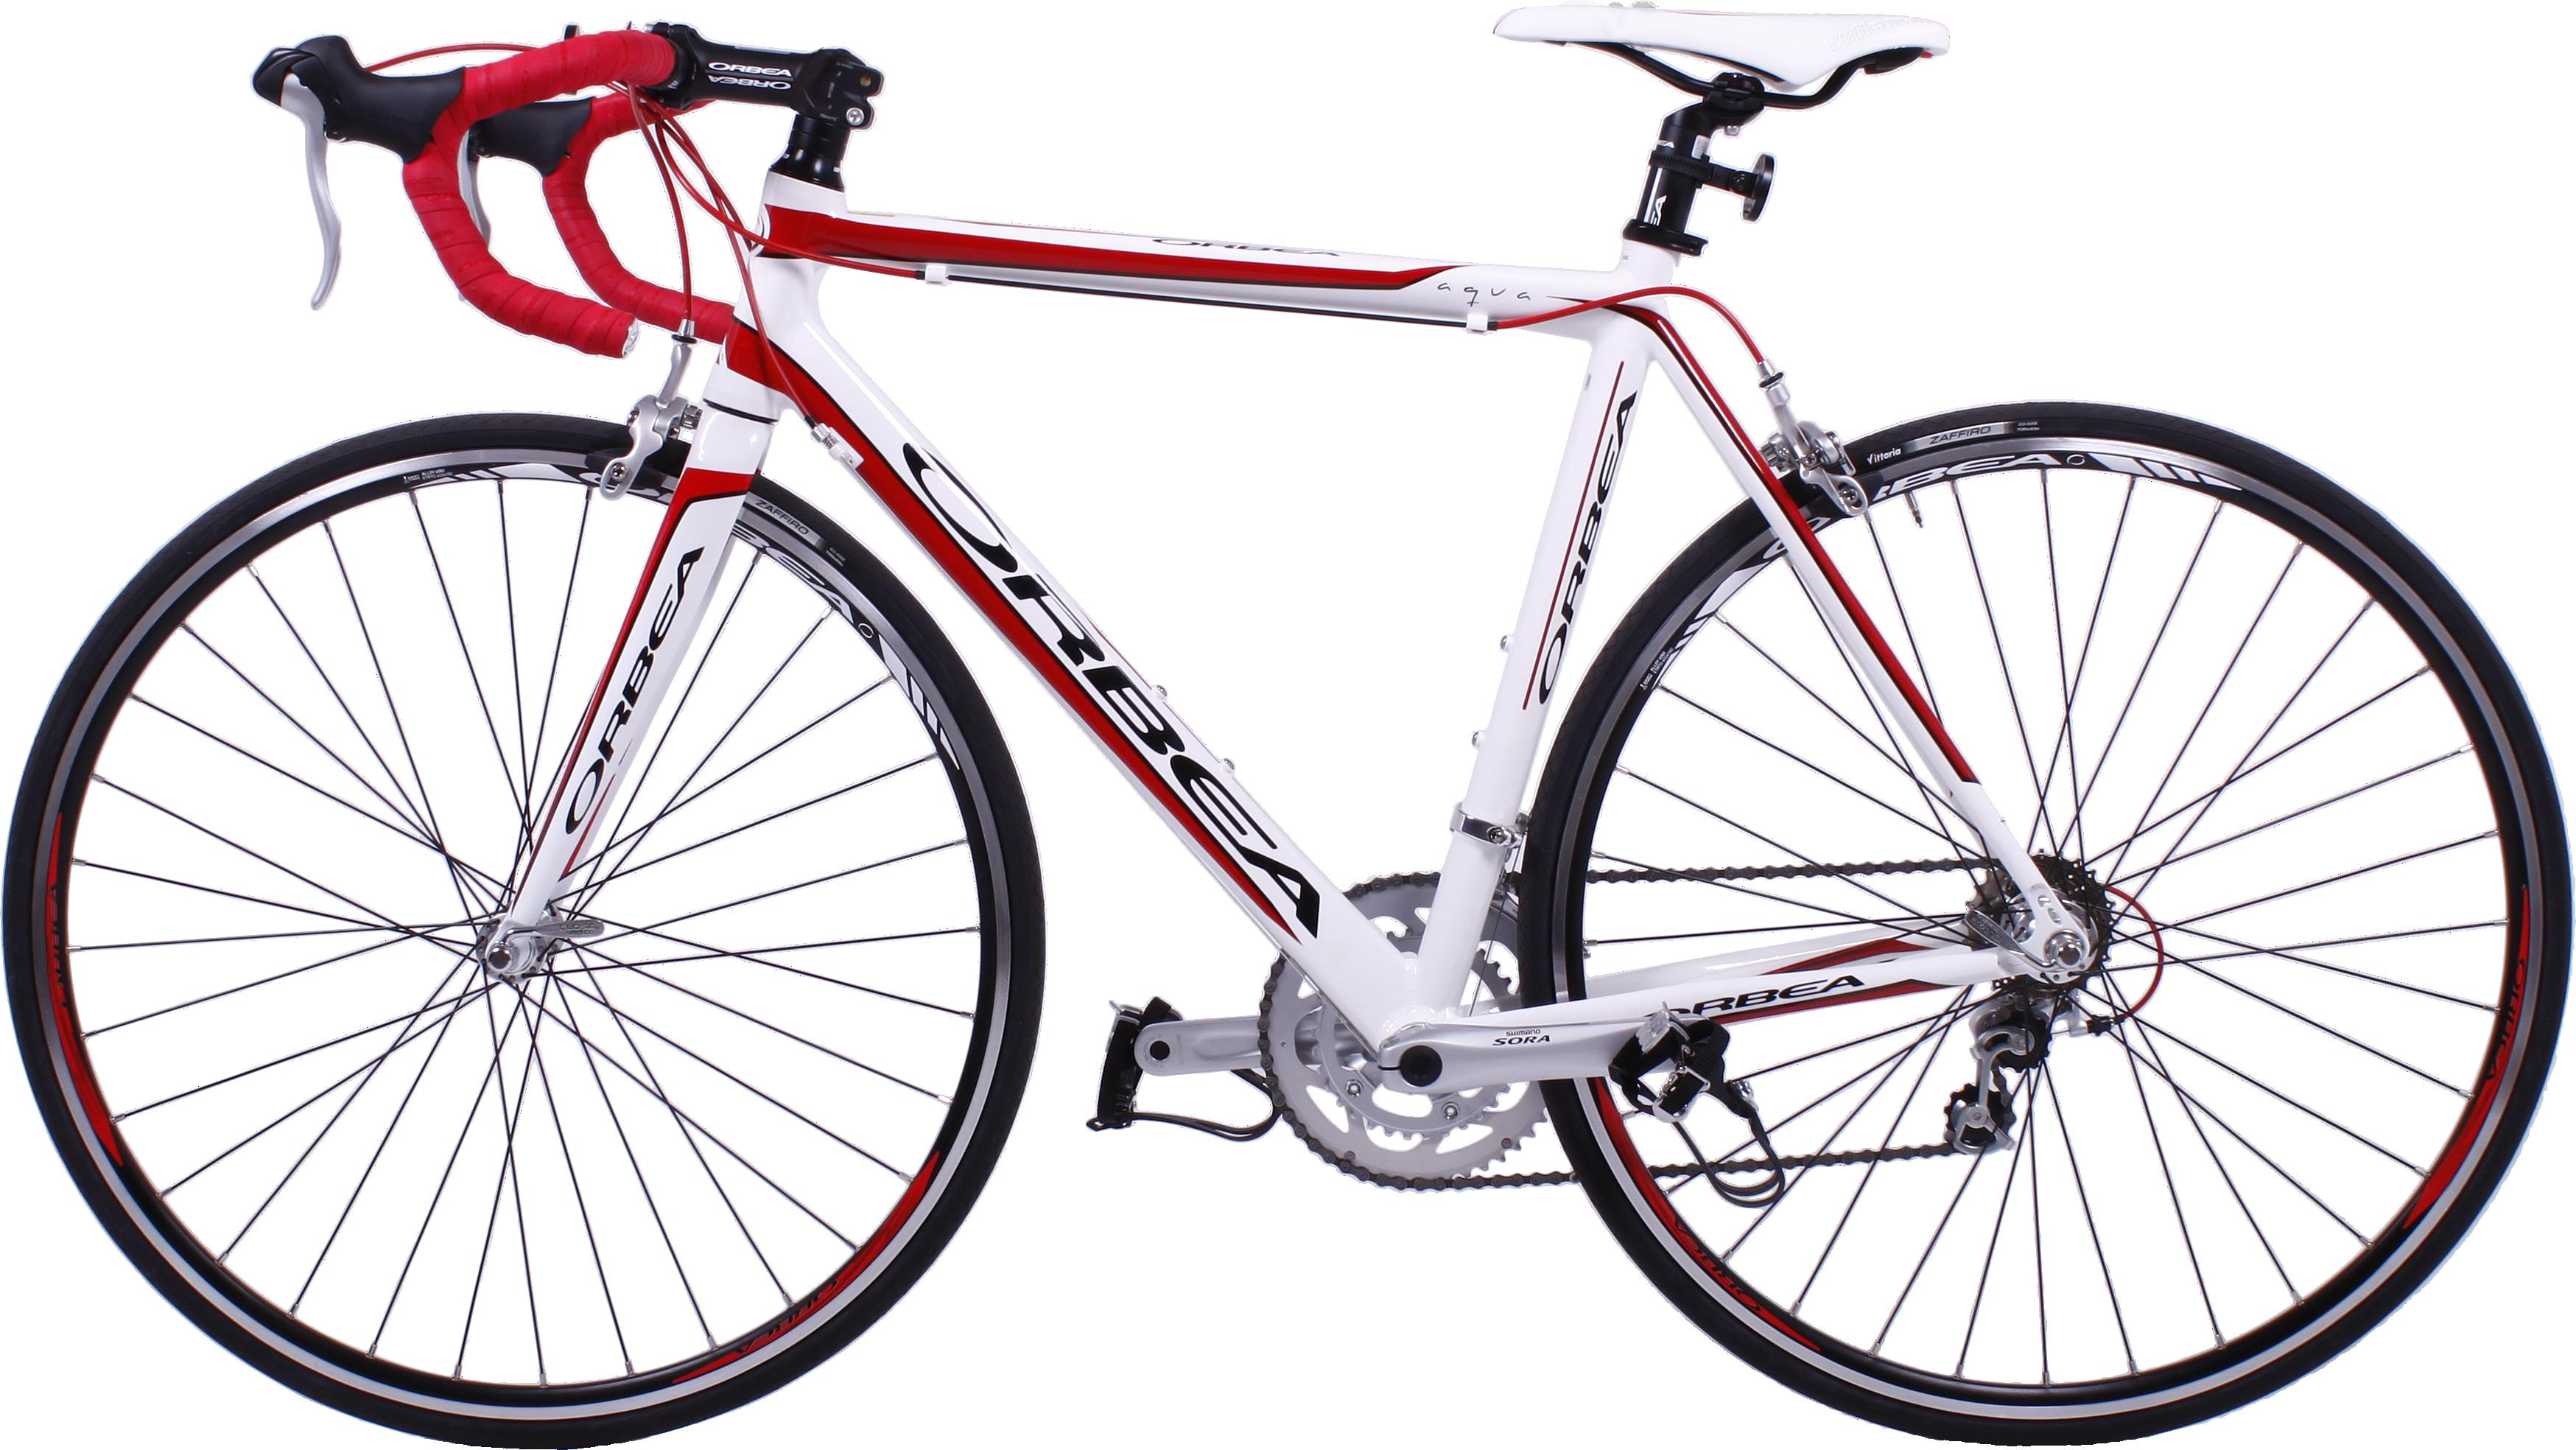

In [ ]:
from IPython.display import Image

#Image preview for Bicycle
Image("images/bicycle/Image_30.jpg")

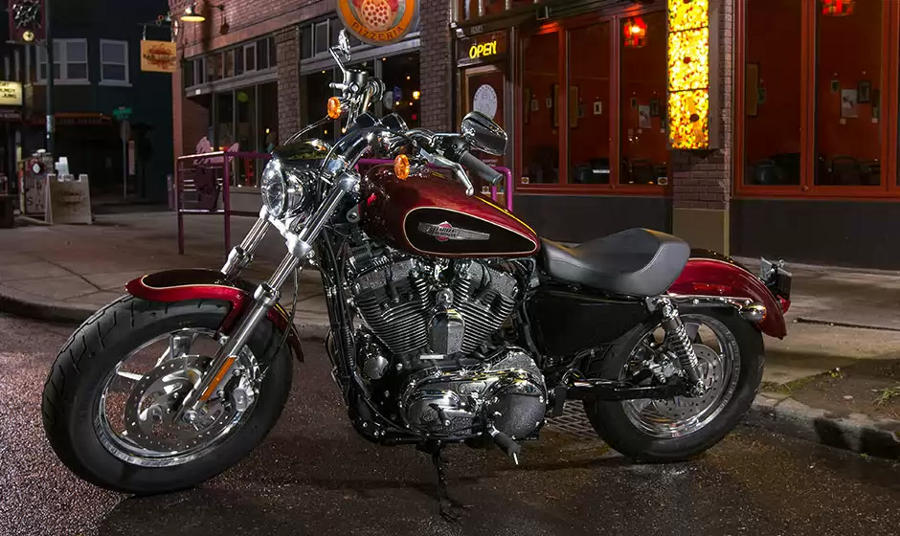

In [ ]:
#Image preview for motor bike

Image("images/motor bike/Image_23.jpg")

# Directories for Train, Test and Validation

In [ ]:
os.mkdir('images/train')  # Training data directory

FileExistsError: ignored

In [ ]:
os.mkdir('images/test')  # testing data directory

In [ ]:
os.mkdir('images/validation')  # validation data directory

## Subdirectories for Bicycle and Motor Bike

In [ ]:
# Crating a subdirectory for Bicycle

os.mkdir('images/validation/bicycle') 
os.mkdir('images/test/bicycle') 
os.mkdir('images/train/bicycle')

FileExistsError: ignored

In [ ]:
# Crating a subdirectory for Motor Bike

os.mkdir('images/validation/motor bike')
os.mkdir('images/test/motor bike')
os.mkdir('images/train/motor bike')

FileExistsError: ignored

## Adding the Images in Sub-directories



In [ ]:
# For Training Data - 60% of the Total Images

# For Bicycle
fnames = ['Image_{}.jpg'.format(i) for i in range(1,180)]
for fname in fnames:
    src = os.path.join('/content/images/bicycle', fname)
    dst = os.path.join('/content/images/train/bicycle', fname)
    shutil.copyfile(src, dst)

# For motor bike

fnames = ['Image_{}.jpg'.format(i) for i in range(1,180)]
for fname in fnames:
    src = os.path.join('/content/images/motor bike', fname)
    dst = os.path.join('/content/images/train/motor bike', fname)
    shutil.copyfile(src, dst)

In [ ]:
# Adding the data to Train variable 

train_dir = '/content/images/train'

In [ ]:
# For Test Data - 20% of the Total Images

# For Bicycle
fnames = ['Image_{}.jpg'.format(i) for i in range(181,240)]
for fname in fnames:
    src = os.path.join('/content/images/bicycle', fname)
    dst = os.path.join('/content/images/test/bicycle', fname)
    shutil.copyfile(src, dst)

# For motor bike

fnames = ['Image_{}.jpg'.format(i) for i in range(181,240)]
for fname in fnames:
    src = os.path.join('/content/images/motor bike', fname)
    dst = os.path.join('/content/images/test/motor bike', fname)
    shutil.copyfile(src, dst)

In [ ]:
# Adding the data to Test variable 

test_dir = '/content/images/test'

In [ ]:
# For Validation Data - 20% of the Total Images

# For Bicycle
fnames = ['Image_{}.jpg'.format(i) for i in range(241,300)]
for fname in fnames:
    src = os.path.join('/content/images/bicycle', fname)
    dst = os.path.join('/content/images/validation/bicycle', fname)
    shutil.copyfile(src, dst)

# For motor bike

fnames = ['Image_{}.jpg'.format(i) for i in range(241,300)]
for fname in fnames:
    src = os.path.join('/content/images/motor bike', fname)
    dst = os.path.join('/content/images/validation/motor bike', fname)
    shutil.copyfile(src, dst)

In [ ]:
# Adding the data to Validation variable 

validation_dir = '/content/images/test'

# Building the Model

In [ ]:
import keras
keras.backend.clear_session()

In [ ]:
#Defining the model and using the activation function relu. 

model = models.Sequential() 
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3))) # 3 Value here states that we are using 3 colors and reshaping into 150 by 150. 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.2)) #Using the dropout Value. 
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid')) #Using sigmoid since it is a clasification problem. 
#Compiling the model. 
model.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['acc'])

In [ ]:
# Model Summary

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [ ]:
#Using Data Augmentation for the train data
#Here we did rescaling, rotated the image, width and height shifted etc. 

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [ ]:
#Validation data is not augmented. 
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# train/ validation gennerator

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=5,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=5,
        class_mode='binary')


Found 358 images belonging to 2 classes.
Found 118 images belonging to 2 classes.


# Fitting the Model

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=30, # 150/5 = 30 (so we are grabbing 30 batches of size 5 images)
      epochs=60,
      validation_data=validation_generator,
      validation_steps=15) # 75/5 = 15 (so we are grabbing 15 batches of size 5 images)

Epoch 1/60
30/30 [==============================] - 16s 521ms/step - loss: 0.5596 - acc: 0.7230 - val_loss: 0.6469 - val_acc: 0.6667
Epoch 2/60
30/30 [==============================] - 14s 478ms/step - loss: 0.6165 - acc: 0.7000 - val_loss: 0.6590 - val_acc: 0.6133
Epoch 3/60
30/30 [==============================] - 14s 473ms/step - loss: 0.4970 - acc: 0.7533 - val_loss: 0.6233 - val_acc: 0.6667
Epoch 4/60
30/30 [==============================] - 14s 475ms/step - loss: 0.4810 - acc: 0.7933 - val_loss: 0.6957 - val_acc: 0.6800
Epoch 5/60
30/30 [==============================] - 14s 478ms/step - loss: 0.5562 - acc: 0.7365 - val_loss: 0.7091 - val_acc: 0.6533
Epoch 6/60
30/30 [==============================] - 15s 491ms/step - loss: 0.6103 - acc: 0.7200 - val_loss: 0.6182 - val_acc: 0.6800
Epoch 7/60
30/30 [==============================] - 15s 486ms/step - loss: 0.5441 - acc: 0.7365 - val_loss: 0.5956 - val_acc: 0.6533
Epoch 8/60
30/30 [==============================] - 14s 469ms/step - 

### Model Output

In [ ]:
! mkdir model_output #creating a directory for the model output

mkdir: cannot create directory ‘model_output’: File exists


In [ ]:
model.save('/content/model_output', overwrite=True) #saving the model output. 

# Model Evaluation

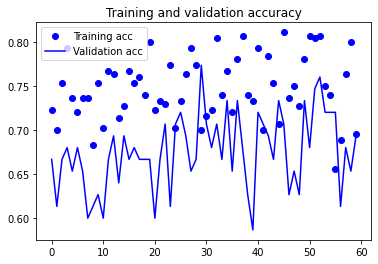

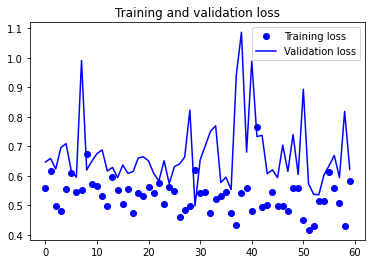

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Observations from the Plot



1.   Training Accuracy increased rapidly in the initial 10 Epochs and thereafter it was flucuating along some standard deviation but however, it was improving. 
2.   Validation loss dropped initially but was constant after 30 epochs. Model did not learn enough after 50 epochs.



In [ ]:
# for simplicity, let's just round
import numpy as np
tmp = model.predict(validation_generator) 
print(tmp.shape)
print(tmp[0:15])
pred = np.round(tmp,0)
print(pred.shape)
print(pred[0:15])

24/24 [==============================] - 4s 152ms/step
(118, 1)
[[0.43072474]
 [0.49482244]
 [0.7648399 ]
 [0.3906899 ]
 [0.43182245]
 [0.6646625 ]
 [0.27472425]
 [0.22662494]
 [0.72896045]
 [0.83280087]
 [0.4922781 ]
 [0.74653536]
 [0.41932958]
 [0.8852317 ]
 [0.9154667 ]]
(118, 1)
[[0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]]


In [ ]:
def flatten(l):
    return [item for sublist in l for item in sublist] #rounding to the nearest digits

In [ ]:
import pandas as pd
my_results = pd.DataFrame(columns={'actual','pred'})
batches = 0
for x_val, y_val in validation_generator:
  batches=batches+1
  y_pred = model.predict(x_val)
  y_pred = flatten(y_pred)
  tmp = pd.DataFrame({'actual': y_val, 'pred': y_pred})
  my_results = my_results.append(tmp)
  if batches >= 75 // 5:  
    # we need to break the loop by hand because
    # the generator loops indefinitely
    break

1/1 [==============================] - 0s 78ms/step


In [ ]:
my_results #look at the output results

,pred,actual
0,0.390690,0.0
1,0.832801,1.0
2,0.528942,0.0
3,0.411649,0.0
4,0.882838,0.0
...,...,...
0,0.846435,0.0
1,0.838245,1.0
2,0.382880,0.0
3,0.931289,1.0


## Confusion Matrix

In [ ]:
#Building the classification report
from sklearn.metrics import classification_report
print(classification_report(y_true=my_results['actual'],
                            y_pred=np.round(my_results['pred'],0)))

              precision    recall  f1-score   support

         0.0       0.83      0.51      0.63        39
         1.0       0.63      0.89      0.74        36

    accuracy                           0.69        75
   macro avg       0.73      0.70      0.69        75
weighted avg       0.73      0.69      0.68        75



In [ ]:
#building the confusion report
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_true=my_results['actual'],
                            y_pred=np.round(my_results['pred'],0)))

[[20 19]
 [ 4 32]]


# Observations and Possible Improvements



*   Initially, I struggled with loading the number of images. I have tried with 1000 images code showed up error. So, I did some trial and error, and I came up with 300 images number.

    In terms of improvments, I would like to try to load manual images in the drivee by unzipping file. I searched across the internet to zip download multiple images that we can feed to our model, and that would definitely results in better accuracy.
*   The images download from the Bing downloader for Bicycles and Motor bikes had a very differnt pattern. For example - In case of Bicycles, sometimes there were just a picture of bicycle, sometimes, it will be just front side of the bicycle, sometimes not even a bicycle in an image, and other times, its another different object like car, bicycle brand bottle, etc. This pattern was similar with Motor bikes as well.

  In terms of improvements, loading more images would definitely help the model to perform better. So, I would really focus on the data exploration to ensure that the images in my trainnig data are actually the bicycles or some other objects not related with the model.

*   In the intial runs, I used 200 images with 60-20-20 image partition to train-test-validation. The model accuracy increased very slowly, but did show an improvement. However, I believe validation based on just 40 images would not give better results due to improper images as mentioned earlier. So, I downloaded around 300 images to improve the sample size. I ran the model again to 150 epochs, and I observed that even though the accuracy did not improved well, the model was 70% confident all the time about the predictions. 

  In terms of improvement, I would definitely look into the ways where more data can be fed to the model to learn better and improvize the accuracy.

*   I strongly felt that for binary classification, the input data/ images really matters. For example - I came across some of the images which were neither motor bike nor bicycles, so the model should have predicted it as an OTHER. However, since it was a binary classification situation, the model has to predict YES Or NO.

  Instead of binary classification problem, if above problem statement is implemented in multiclass (in this case 3 classes - Bicycle, Motor Bike, Other), then the model predictions could have been in 99%.



*   This was my first model in convolution neural networks, however, I was pretty confident with the number of trainable parameters calcualtions from the initial modules. Also, CNN felt bit easier than dense neural networks in terms of running the model, but for data preparation and processing it felt challenging and time consuming. 

  I am still puzzled somehow regarding the flattening of images, the hidden nodes, the kernel in CNN. I am still amazed with the number of calculations that are done at each node 😯. Definitely something to look into!! 👍




THANK YOU PROFESSOR!! 🙂 